# 3Blades Churn Rate Demo
------------------------------------------


This Notebook provides an example of how to automate **Machine Learning (ML) workflows** with [scikit-learn](http://scikit-learn.org/) and [Magics](https://ipython.org/ipython-doc/3/interactive/magics.html) and applies these to these methodologies to a churn rate predictor. Use this demo by changing the values of k-folds, x and Y in order to explore! This demo follows the following workflow, adapted from [Jason Browlee via Machine Learning Mastery](http://machinelearningmastery.com/author/jasonb/): 

> 
1. [Define the problem & Imports](#Defining-the-problem-by-exploring-the-data)
1. [Prepare the data](#Preparing-the-data-for-modeling)
1. [Cross Validation and Model Preparation](#Preparing-the-model)
1. [Run Model](#Run-the-ML-algorithm)
1. [Spot Check Algorithm](#Spot-check-algorithms)


## Demo Goal
-----
This demo's main goal is to make it easy to use the Machine Learning Workflow to solve real life marketing problems.
It allows users to perform **data science quickly and cleanly**.

Superset provides:
* The ability to set X, y, and k-folds for a personalized demo experience. 
* A rich set of models, tools and helpful hints to guide you through the process step by step. 
* The ability to code in Python and R and import from a variety of data sources, so you aren't locked in. 
* Fast run times without sacrificing on folds, model types or model accuracy. 
* The ability to change performance metrics so you have the power to interpret models in the way with which you're most comfortable.

## Define the problem
-------------------

Churn is the measure of the the amount of people who stop subscribing or buying a product over time. In situations where consumers are subscribing to a service it is important to measure how likely those people are to stop subscribing. In this demo, when churn is true, it will hold the value of 1. When a customer does not churn, it will hold a value of 0.

## Import Data & Libraries
-------------------
We will now dowload our data and libraries. We will also list our features and view the first few lines of data. 

In [1]:
#Import libraries
%run ./Libraries.ipynb

#Import data anfd view first few rows
churn_df = pd.read_csv("churndata.csv")
churn_df.head()

/Users/Annmarie/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [2]:
churn_result = churn_df['Churn?']
y = np.where(churn_result == 'True.',1,0)

# We don't need these columns
# Notice here that she has to drop these columns because there's not a way to convert them into binary variables or 
# anything meaningful with writing additional code. Eezzy can handle the conversion of these variables.
to_drop = ['State','Area Code','Phone','Churn?']
churn_feat_space = churn_df.drop(to_drop,axis=1)

# 'yes'/'no' has to be converted to boolean values
# NumPy converts these from boolean to 1. and 0. later
yes_no_cols = ["Int'l Plan","VMail Plan"]
churn_feat_space[yes_no_cols] = churn_feat_space[yes_no_cols] == 'yes'

# Pull out features for future use
features = churn_feat_space.columns

X = churn_feat_space.as_matrix().astype(np.float)

#### Here are our features:
    1. Account Length
    2. International Plan
    3. Voicemail Plan
    4. Voicemail Messages
    5. Day Minutes
    6. Day Calls
    7. Day Charge
    8. Eve Minutes
    9. Eve Calls
    10. Eve Charge
    11. Night Minutes
    12. Night Calls
    13. Night Charge 
    14. International Minutes
    15. International Calls
    16. International Charge
    17. Customer Service Calls 

## Cleanse
Now lets do data cleaning. To do this we will isolate target data, get rid of any columns we don't need and then convert any 'yes'/'no' values to values of 1/0. By doing this, we make it easy to make sense of all of our data. At this point, all missing values have been removed. We will then pull out our features and place them in a sparse matrix for analysis. It is also important that we standardize our data. This is a common requirement for many models and can be done with skit-learn's preprocessor. This will create a Gaussian distribution with zero mean and unit variance. Once completed, we can graph our distribution and move on to transforming our data to prepare for modeling. 

In [3]:
# Isolate target data, remove uneeded columns, 
%run ./FeatureEngineering.ipynb


# This is important
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X) 

Feature space holds 3333 observations and 17 features
Unique target labels: [0 1]


## Transform
-----

Now it is time to transform our data. In the following cells we will take our data and begin to optimize it. To do this we will look at what features are the most important to the data set. We will check the relationship between the variables and make sure that we have the best features in their best possible format. 

We now find that the following three features are the most important to the data set 
1. International Plan
2. Voicemail Plan
3. Account Length

In [4]:
#Check for colinearity 
churn_df.corr()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
Account Length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796
Area Code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572
VMail Message,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263
Day Mins,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423
Day Calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942
Day Charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427
Eve Mins,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985
Eve Calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423
Eve Charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987
Night Mins,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288


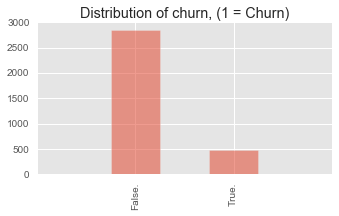

In [5]:
# %load ./Visualizations.py.html


# In[16]:

from IPython.core.magic import (register_line_magic, register_cell_magic,
                                register_line_cell_magic)

register_cell_magic('Visualizations')

get_ipython().magic(u'run ./Libraries.ipynb')

# Isolate target data  
churn_result = churn_df["Churn?"]  
y = np.where(churn_result == 'True.',1,0)  

fig = plt.figure(figsize=(18,6), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

ax1 = plt.subplot2grid((2,3),(0,0))
# plots a bar graph of those churn vs those who do not.               
churn_result.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
ax1.set_xlim(-1, 2)
plt.title("Distribution of churn, (1 = Churn)")    

## Cross Validation and Model Preparation 
-----

Now let's set up the parameters for the model cross validation-- we will use K-Folds. In the next line, chance the "n folds" object to your desired number of folds and then run! 

How well will your ML algorithms perform?

- Make predictions for new data for known answers
- Resampling methods estimates performance on new data.

> It is important to evaluate ML algorithms using data that is different than the data used to train ML algorithm, to avoid **overfitting**

- This notebook uses K-folds to avoid over fitting and ensures we make good predictions!

In [6]:
#Set folds by changing the "n_folds" object 
kf = KFold(len(y),n_folds=25,shuffle=True) 

In [7]:
# Construct a kfolds object
def run_cv(X,y,clf_class,**kwargs):
    y_pred = y.copy()
    # Iterate through folds
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        # Initialize a classifier with key word arguments
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
    return y_pred

In [8]:
run_cv

<function __main__.run_cv>

## Spot Check Models

##### For this data set we will test Support Vector Machines, Random Forests and K-nearest neighbors. Note that Random Forest seems to perform the best. To remove a model, feel free to add # before that line to exclude it. 

In [9]:
def accuracy(y_true,y_pred):
    # NumPy interprets True and False as 1. and 0.
    return np.mean(y_true == y_pred)

In [10]:
print "Support vector machines:"
print "%.3f" % accuracy(y, run_cv(X,y,SVC))
print "Random forest:"
print "%.3f" % accuracy(y, run_cv(X,y,RF))
print "K-nearest-neighbors:"
print "%.3f" % accuracy(y, run_cv(X,y,KNN))

Support vector machines:
0.921
Random forest:
0.945
K-nearest-neighbors:
0.893


[[2818   32]
 [ 230  253]]


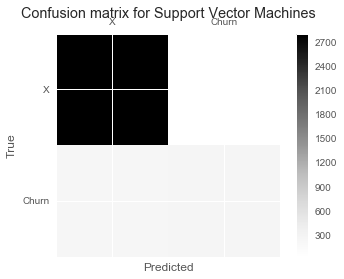

[[2822   28]
 [ 147  336]]


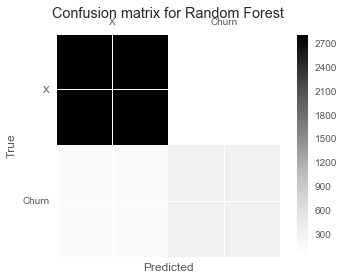

[[2804   46]
 [ 309  174]]


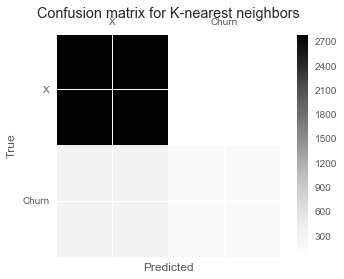

In [11]:
%run ./SpotCheck.ipynb

##### Here we can try Bayesian Optimization to see if this improves our models, let's use the top two models from our intial test harness, SVM and RF. This will also help correct for overfitting. 

In [12]:
##BaysOpt
def svccv(C, gamma):
    return cross_val_score(SVC(C=C, gamma=gamma, random_state=2),
                           X, y, 'roc_auc', cv=2).mean()

def rfccv(n_estimators, min_samples_split, max_features):
    return cross_val_score(RFC(n_estimators=int(n_estimators),
                               min_samples_split=int(min_samples_split),
                               max_features=min(max_features, 0.999),
                               random_state=2),
                           X, y, 'roc_auc', cv=2).mean()
if __name__ == "__main__":
    gp_params = {"alpha": 1e5}

    svcBO = BayesianOptimization(svccv, {'C': (0.001, 100), 'gamma': (0.0001, 0.1)})
    svcBO.explore({'C': [0.001, 0.01, 0.1], 'gamma': [0.001, 0.01, 0.1]})

    rfcBO = BayesianOptimization(rfccv, {'n_estimators': (10, 250),
                                         'min_samples_split': (2, 25),
                                         'max_features': (0.1, 0.999)})

    svcBO.maximize(n_iter=10, **gp_params)
    print('-'*53)
    rfcBO.maximize(n_iter=10, **gp_params)

    print('-'*53)
    print('Final Results')
    print('SVC: %f' % svcBO.res['max']['max_val'])
    print('RFC: %f' % rfcBO.res['max']['max_val'])

Initialization
-----------------------------------------------------
 Step |   Time |      Value |         C |     gamma | 
    1 | 00m00s |    0.81055 |    0.0010 |    0.0010 | 
    2 | 00m00s |    0.88666 |    0.0100 |    0.0100 | 
    3 | 00m00s |    0.89423 |    0.1000 |    0.1000 | 
    4 | 00m00s |    0.84700 |   86.0017 |    0.0679 | 
    5 | 00m00s |    0.86736 |   73.4304 |    0.0294 | 
    6 | 00m00s |    0.84798 |   76.8692 |    0.0853 | 
    7 | 00m00s |    0.85026 |   91.6730 |    0.0468 | 
    8 | 00m00s |    0.84846 |   73.2358 |    0.0591 | 
Bayesian Optimization
-----------------------------------------------------
 Step |   Time |      Value |         C |     gamma | 
    9 | 00m00s |    0.89865 |    0.0018 |    0.0493 | 
   10 | 00m00s |    0.84834 |   99.9968 |    0.0903 | 
   11 | 00m00s |    0.89851 |    0.0023 |    0.0606 | 
   12 | 00m00s |    0.84952 |   99.9998 |    0.0967 | 
   13 | 00m00s |    0.89715 |    0.0012 |    0.0667 | 
   14 | 00m00s |    0.84781 | 

## Fit Model
-----

We will now fit a random forest model as it is the highest performing model after both normal cross validation and bayesian optimization.


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline

model = RandomForestClassifier(n_jobs = 10,random_state =50)

In [39]:
n_estimator = 10
X, y = make_classification(n_samples=5000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
# It is important to train the ensemble of trees on a different subset
# of the training data than the linear regression model to avoid
# overfitting, in particular if the total number of leaves is
# similar to the number of training samples
X_train, X_train_lr, y_train, y_train_lr = train_test_split(X_train,
                                                            y_train,
                                                            test_size=0.5)

In [40]:
def accuracy(y_true,y_pred):
    # NumPy interprets True and False as 1. and 0.
    return np.mean(y_true == y_pred)

print "Random forest:"
print "%.3f" % accuracy(y, run_cv(X,y,RF))

Random forest:
0.967


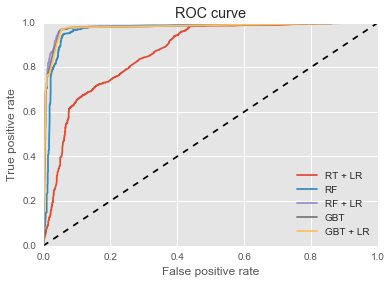

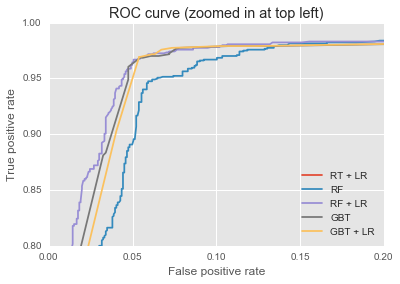

In [41]:
# Unsupervised transformation based on totally random trees
rt = RandomTreesEmbedding(max_depth=3, n_estimators=n_estimator,
    random_state=0)

rt_lm = LogisticRegression()
pipeline = make_pipeline(rt, rt_lm)
pipeline.fit(X_train, y_train)
y_pred_rt = pipeline.predict_proba(X_test)[:, 1]
fpr_rt_lm, tpr_rt_lm, _ = roc_curve(y_test, y_pred_rt)

# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=n_estimator)
rf_enc = OneHotEncoder()
rf_lm = LogisticRegression()
rf.fit(X_train, y_train)
rf_enc.fit(rf.apply(X_train))
rf_lm.fit(rf_enc.transform(rf.apply(X_train_lr)), y_train_lr)

y_pred_rf_lm = rf_lm.predict_proba(rf_enc.transform(rf.apply(X_test)))[:, 1]
fpr_rf_lm, tpr_rf_lm, _ = roc_curve(y_test, y_pred_rf_lm)

grd = GradientBoostingClassifier(n_estimators=n_estimator)
grd_enc = OneHotEncoder()
grd_lm = LogisticRegression()
grd.fit(X_train, y_train)
grd_enc.fit(grd.apply(X_train)[:, :, 0])
grd_lm.fit(grd_enc.transform(grd.apply(X_train_lr)[:, :, 0]), y_train_lr)

y_pred_grd_lm = grd_lm.predict_proba(
    grd_enc.transform(grd.apply(X_test)[:, :, 0]))[:, 1]
fpr_grd_lm, tpr_grd_lm, _ = roc_curve(y_test, y_pred_grd_lm)


# The gradient boosted model by itself
y_pred_grd = grd.predict_proba(X_test)[:, 1]
fpr_grd, tpr_grd, _ = roc_curve(y_test, y_pred_grd)


# The random forest model by itself
y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rt_lm, tpr_rt_lm, label='RT + LR')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_rf_lm, tpr_rf_lm, label='RF + LR')
plt.plot(fpr_grd, tpr_grd, label='GBT')
plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBT + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rt_lm, tpr_rt_lm, label='RT + LR')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_rf_lm, tpr_rf_lm, label='RF + LR')
plt.plot(fpr_grd, tpr_grd, label='GBT')
plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBT + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

## What Does This Mean?
----
After performing multiple models, checking those models via multiple means of spot checking and cross validation, we can now conclude that the Random Forest Classifier performs the best. This means that we can predict whether or not a customer will churn with 96.7 percent accuracy. 